### Let's do a mini web scraping project on OReilly Data Science Books

In [78]:
# import libraries
import pandas as pd
import numpy as np
import time # artificial pings so ip don't get banned
from selenium import webdriver
import bs4
import matplotlib.pyplot as plt
import seaborn as sns

websitelink at 

https://www.oreilly.com/search/?query=*&extended_publisher_data=true&highlight=true&include_assessments=false&include_case_studies=true&include_courses=true&include_playlists=true&include_collections=true&include_notebooks=true&include_sandboxes=true&include_scenarios=true&is_academic_institution_account=false&source=user&formats=book&sort=relevance&facet_json=true&json_facets=true&page=0&include_facets=false&include_practice_exams=true

In [2]:
# test url
test_url = 'https://www.oreilly.com/search/?query=*&extended_publisher_data=true&highlight=true' + \
'&include_assessments=false&include_case_studies=true&include_courses=true&include_playlists=true' + \
'&include_collections=true&include_notebooks=true&include_sandboxes=true&include_scenarios=true' + \
'&is_academic_institution_account=false&source=user&formats=book&sort=relevance&facet_json=true' + \
'&json_facets=true&page=' + str(0) + \
'&include_facets=false&include_practice_exams=true'

In [3]:
# Full path where your chromedriver.exe is
# Note to self: Remember to clear before upload to gitHub

#path = r'enter full path'

In [6]:
# Initialize WebDriver Object
driver = webdriver.Chrome(path)
driver.get(test_url)

# wait for page to load completely
time.sleep(10)

# scroll to bottom of site
driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')

time.sleep(2)

# scrape
source = driver.page_source

# Close driver once done
driver.close()

In [8]:
test_soup = bs4.BeautifulSoup(source)
test_soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="#B9002D" name="theme-color"/>
<link as="style" href="/search/dist/orm.78766f3d40b4e797748f.css" rel="preload"/>
<link as="style" href="/search/dist/main.78766f3d40b4e797748f.css" rel="preload"/>
<link as="font" crossorigin='"anonymous"' href="https://cdn.oreillystatic.com/fonts/GuardianText/GuardianTextSans-Medium-Web.woff2" rel="preload" type="font/woff2"/>
<link as="font" crossorigin='"anonymous"' href="https://cdn.oreillystatic.com/fonts/GuardianText/GuardianTextSans-Regular-Web.woff2" rel="preload" type="font/woff2"/>
<link href="//www.oreilly.com/favicon.ico" rel="shortcut icon"/>
<title>Search</title>
<link href="/search/dist/orm.78766f3d40b4e797748f.css" rel="stylesheet"/>
<link href="/search/dist/main.78766f3d40b4e797748f.css" rel="stylesheet"/>
<script async="" src="//nebula-cdn.kampyle.com/resources/onsite/js/cool-2.1.15.min.js" type="text/javasc

In [40]:
len(test_soup)

1

### Sifting through the data (check by first elements)

In [41]:
# Titles
test_list = test_soup.find_all('h4', class_ = "Title--2YBJJ")
test_list

[<h4 class="Title--2YBJJ"><a href="/library/view/hands-on-machine-learning/9781492032632/"><span>Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition</span></a></h4>,
 <h4 class="Title--2YBJJ"><a href="/library/view/designing-data-intensive-applications/9781491903063/"><span>Designing Data-Intensive Applications</span></a></h4>,
 <h4 class="Title--2YBJJ"><a href="/library/view/fluent-python-2nd/9781492056348/"><span>Fluent Python, 2nd Edition</span></a></h4>,
 <h4 class="Title--2YBJJ"><a href="/library/view/fundamentals-of-software/9781492043447/"><span>Fundamentals of Software Architecture</span></a></h4>,
 <h4 class="Title--2YBJJ"><a href="/library/view/ocp-oracle-certified/9781119619130/"><span>OCP Oracle Certified Professional Java SE 11 Developer Complete Study Guide</span></a></h4>,
 <h4 class="Title--2YBJJ"><a href="/library/view/learning-go/9781492077206/"><span>Learning Go</span></a></h4>,
 <h4 class="Title--2YBJJ"><a href="/library/view/head-first-d

In [22]:
len(test_list)

10

In [23]:
first_book = test_list[0]

In [24]:
first_book.find('span').text

'JavaScript: The Definitive Guide, 7th Edition'

In [65]:
# Author
author_list = test_soup.find_all('p', class_ = "orm-ByLine-root Byline--1JYZE")
author_list

[<p class="orm-ByLine-root Byline--1JYZE">By <a class="orm-Link-root" href='/search/?query=author%3A"Aurélien Géron"&amp;page=0'>Aurélien Géron</a></p>,
 <p class="orm-ByLine-root Byline--1JYZE">By <a class="orm-Link-root" href='/search/?query=author%3A"Martin Kleppmann"&amp;page=0'>Martin Kleppmann</a></p>,
 <p class="orm-ByLine-root Byline--1JYZE">By <a class="orm-Link-root" href='/search/?query=author%3A"Luciano Ramalho"&amp;page=0'>Luciano Ramalho</a></p>,
 <p class="orm-ByLine-root Byline--1JYZE">By <a class="orm-Link-root" href='/search/?query=author%3A"Mark Richards"&amp;page=0'>Mark Richards</a> and <a class="orm-Link-root" href='/search/?query=author%3A"Neal Ford"&amp;page=0'>Neal Ford</a></p>,
 <p class="orm-ByLine-root Byline--1JYZE">By <a class="orm-Link-root" href='/search/?query=author%3A"Jeanne Boyarsky"&amp;page=0'>Jeanne Boyarsky</a> and <a class="orm-Link-root" href='/search/?query=author%3A"Scott Selikoff"&amp;page=0'>Scott Selikoff</a></p>,
 <p class="orm-ByLine-roo

In [68]:
first_author = author_list[0]
first_author.text

'By Aurélien Géron'

In [8]:
# Publisher and publishDate
pub_list = test_soup.find_all('a', class_ = 'Publisher--hr8S9')
pub_list

[<a class="Publisher--hr8S9" href="/library/publisher/oreilly-media-inc/">O'Reilly Media, Inc.</a>,
 <a class="Publisher--hr8S9" href="/library/publisher/oreilly-media-inc/">O'Reilly Media, Inc.</a>,
 <a class="Publisher--hr8S9" href="/library/publisher/oreilly-media-inc/">O'Reilly Media, Inc.</a>,
 <a class="Publisher--hr8S9" href="/library/publisher/oreilly-media-inc/">O'Reilly Media, Inc.</a>,
 <a class="Publisher--hr8S9" href="/library/publisher/sybex/">Sybex</a>,
 <a class="Publisher--hr8S9" href="/library/publisher/oreilly-media-inc/">O'Reilly Media, Inc.</a>,
 <a class="Publisher--hr8S9" href="/library/publisher/oreilly-media-inc/">O'Reilly Media, Inc.</a>,
 <a class="Publisher--hr8S9" href="/library/publisher/no-starch-press/">No Starch Press</a>,
 <a class="Publisher--hr8S9" href="/library/publisher/oreilly-media-inc/">O'Reilly Media, Inc.</a>,
 <a class="Publisher--hr8S9" href="/library/publisher/oreilly-media-inc/">O'Reilly Media, Inc.</a>]

In [9]:
first_pub = pub_list[0]
first_pub.text

"O'Reilly Media, Inc."

In [76]:
pubDate_list = test_soup.find_all('span', class_ = "Publishers--3Vokz")
pubDate_list

[<span class="Publishers--3Vokz"><a class="Publisher--hr8S9" href="/library/publisher/oreilly-media-inc/">O'Reilly Media, Inc.</a><span>September 2019</span></span>,
 <span class="Publishers--3Vokz"><a class="Publisher--hr8S9" href="/library/publisher/oreilly-media-inc/">O'Reilly Media, Inc.</a><span>March 2017</span></span>,
 <span class="Publishers--3Vokz"><a class="Publisher--hr8S9" href="/library/publisher/oreilly-media-inc/">O'Reilly Media, Inc.</a><span>November 2021</span></span>,
 <span class="Publishers--3Vokz"><a class="Publisher--hr8S9" href="/library/publisher/oreilly-media-inc/">O'Reilly Media, Inc.</a><span>January 2020</span></span>,
 <span class="Publishers--3Vokz"><a class="Publisher--hr8S9" href="/library/publisher/sybex/">Sybex</a><span>August 2020</span></span>,
 <span class="Publishers--3Vokz"><a class="Publisher--hr8S9" href="/library/publisher/oreilly-media-inc/">O'Reilly Media, Inc.</a><span>March 2021</span></span>,
 <span class="Publishers--3Vokz"><a class="Pu

In [13]:
book_lst = []
author_lst = []
pub_lst = []
pubDate_lst = []

name_list = test_soup.find_all('h4', class_ = "Title--2YBJJ")
authorname_list = test_soup.find_all('p', class_ = "orm-ByLine-root Byline--1JYZE")
pubname_list = test_soup.find_all('a', class_ = "Publisher--hr8S9")
pubDate_list = test_soup.find_all('span', class_ = "Publishers--3Vokz")

for i in name_list:
    book = i.find('span').text
    book_lst.append(book)
for j in authorname_list:
    author = j.text[3:] #slicing to drop the 'By '
    author_lst.append(author)
for k in pubname_list:
    pub = k.text
    pub_lst.append(pub)
for l in pubDate_list:
    date = l.find('span').text
    pubDate_lst.append(date)

In [14]:
print(book_lst[0])
print(author_lst[0])
print(pub_lst[0])
print(pubDate_lst[0])

Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition
Aurélien Géron
O'Reilly Media, Inc.
September 2019


In [81]:
df_book = pd.DataFrame({'Title': book_lst,
                        'Author': author_lst,
                        'Publisher': pub_lst,
                        'DatePrint': pubDate_lst, 
                       })
df_book

,Title,Author,Publisher,DatePrint
0,"Hands-On Machine Learning with Scikit-Learn, K...",Aurélien Géron,"O'Reilly Media, Inc.",September 2019
1,Designing Data-Intensive Applications,Martin Kleppmann,"O'Reilly Media, Inc.",March 2017
2,"Fluent Python, 2nd Edition",Luciano Ramalho,"O'Reilly Media, Inc.",November 2021
3,Fundamentals of Software Architecture,Mark Richards and Neal Ford,"O'Reilly Media, Inc.",January 2020
4,OCP Oracle Certified Professional Java SE 11 D...,Jeanne Boyarsky and Scott Selikoff,Sybex,August 2020
5,Learning Go,Jon Bodner,"O'Reilly Media, Inc.",March 2021
6,"Head First Design Patterns, 2nd Edition",Eric Freeman and Elisabeth Robson,"O'Reilly Media, Inc.",December 2020
7,"Python Crash Course, 2nd Edition",Eric Matthes,No Starch Press,May 2019
8,"Building Microservices, 2nd Edition",Sam Newman,"O'Reilly Media, Inc.",August 2021
9,"Programming Rust, 2nd Edition","Jim Blandy, Jason Orendorff and Leonora F.S. T...","O'Reilly Media, Inc.",June 2021


In [82]:
df_book.to_csv('OReillybook_list.csv')

---

### Putting it altogether

In [23]:
xbook_lst = []
xauthor_lst = []
xpub_lst = []
xpubDate_lst = []

mainbook_lst = []
mainauthor_lst = []
mainpub_lst = []
mainpubDate_lst = []

# Initialize WebDriver Object
driver = webdriver.Chrome(path)
#driver.implicitly_wait(10)
driver.get(test_url)

# First 5 pages
for n in range(1,6):
    # wait for page to load completely
    time.sleep(10)

    # scroll to bottom of site
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')

    time.sleep(2)

    # scrape
    temp_source = driver.page_source
    temp_soup = bs4.BeautifulSoup(temp_source)

    xname_list = temp_soup.find_all('h4', class_ = "Title--2YBJJ")
    xauthorname_list = temp_soup.find_all('p', class_ = "orm-ByLine-root Byline--1JYZE")
    xpubname_list = temp_soup.find_all('a', class_ = "Publisher--hr8S9")
    xpubDate_list = temp_soup.find_all('span', class_ = "Publishers--3Vokz")

    for i in xname_list:
        book = i.find('span').text
        xbook_lst.append(book)
        
    for j in xauthorname_list:
        author = j.text[3:] #slicing to drop the 'By '
        xauthor_lst.append(author)
        
    for k in xpubname_list:
        pub = k.text
        xpub_lst.append(pub)
        
    for l in xpubDate_list:
        date = l.find('span').text
        xpubDate_lst.append(date)
        
    # plug in n value to li[]
    x_path = '/html/body/div[1]/div/main/div/div/footer/div/nav/ul/li[{0}]/button/span'.format(n+1)
    
    nxt_button = driver.find_element_by_xpath(x_path)
    nxt_button.click()
    
# Close driver once done
driver.close()

In [24]:
len(xbook_lst)

50

In [22]:
xbook_lst

['Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition',
 'Designing Data-Intensive Applications',
 'Fluent Python, 2nd Edition',
 'Fundamentals of Software Architecture',
 'Learning Go',
 'OCP Oracle Certified Professional Java SE 11 Developer Complete Study Guide',
 'Head First Design Patterns, 2nd Edition',
 'Python Crash Course, 2nd Edition',
 'Building Microservices, 2nd Edition',
 'Programming Rust, 2nd Edition',
 'JavaScript: The Definitive Guide, 7th Edition',
 'AWS Certified Solutions Architect Associate All-in-One Exam Guide, Second Edition (Exam SAA-C02), 2nd Edition',
 'CCNP and CCIE Enterprise Core ENCOR 350-401 Official Cert Guide',
 'Learning Spark, 2nd Edition',
 'Kafka: The Definitive Guide, 2nd Edition',
 'Learning SQL, 3rd Edition',
 'Kubernetes in Action',
 'Exam Ref AZ-900 Microsoft Azure Fundamentals, 2nd Edition',
 'Learning React, 2nd Edition',
 'Software Engineering at Google',
 'Terraform: Up & Running, 2nd Edition',
 'Cisco Certifie

In [25]:
df_book5 = pd.DataFrame({'Title': xbook_lst,
                        'Author': xauthor_lst,
                        'Publisher': xpub_lst,
                        'DatePrint': xpubDate_lst, 
                       })
df_book5

,Title,Author,Publisher,DatePrint
0,"Hands-On Machine Learning with Scikit-Learn, K...",Aurélien Géron,"O'Reilly Media, Inc.",September 2019
1,Designing Data-Intensive Applications,Martin Kleppmann,"O'Reilly Media, Inc.",March 2017
2,"Fluent Python, 2nd Edition",Luciano Ramalho,"O'Reilly Media, Inc.",November 2021
3,Fundamentals of Software Architecture,Mark Richards and Neal Ford,"O'Reilly Media, Inc.",January 2020
4,Learning Go,Jon Bodner,"O'Reilly Media, Inc.",March 2021
5,OCP Oracle Certified Professional Java SE 11 D...,Jeanne Boyarsky and Scott Selikoff,Sybex,August 2020
6,"Head First Design Patterns, 2nd Edition",Eric Freeman and Elisabeth Robson,"O'Reilly Media, Inc.",December 2020
7,"Python Crash Course, 2nd Edition",Eric Matthes,No Starch Press,May 2019
8,"Building Microservices, 2nd Edition",Sam Newman,"O'Reilly Media, Inc.",August 2021
9,"Programming Rust, 2nd Edition","Jim Blandy, Jason Orendorff and Leonora F.S. T...","O'Reilly Media, Inc.",June 2021


In [26]:
df_book5.to_csv('OReillybook5pages.csv')

In [27]:
# setting data type
df_book5.convert_dtypes().dtypes

Title        string
Author       string
Publisher    string
DatePrint    string
dtype: object

In [29]:
df_book5['DatePrint'] = pd.to_datetime(df_book5['DatePrint'],format='%B %Y')

In [45]:
df_subset = df_book5[['DatePrint','Publisher']].copy()

In [46]:
df_subset = df_subset.sort_values(by=['DatePrint'])

In [47]:
df_subset = df_subset.reset_index(drop=True)

In [75]:
df_viz = df_subset.groupby(['DatePrint','Publisher']).size().to_frame('Count').reset_index()

In [67]:
#df_viz.set_index('DatePrint',inplace=True)

In [76]:
df_viz

,DatePrint,Publisher,Count
0,2017-03-01,"O'Reilly Media, Inc.",1
1,2017-10-01,"O'Reilly Media, Inc.",1
2,2017-12-01,Addison-Wesley Professional,1
3,2018-01-01,Manning Publications,1
4,2018-02-01,"O'Reilly Media, Inc.",1
5,2018-05-01,Sybex,1
6,2019-04-01,Sybex,1
7,2019-05-01,No Starch Press,1
8,2019-09-01,Addison-Wesley Professional,1
9,2019-09-01,"O'Reilly Media, Inc.",2


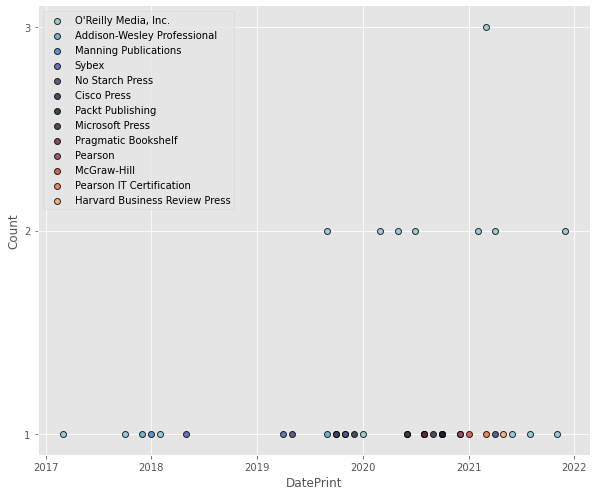

In [112]:
# Data (DatePrint, Publisher, Count)
# Style
plt.style.use('ggplot')
# Plot
ax = sns.lmplot(x='DatePrint', y='Count',data=df_viz,
                fit_reg=False, #no regression line
                hue='Publisher',height=7, aspect=1.2, legend=False,legend_out=False,
                palette='icefire',
                scatter_kws={'linewidths':1,'edgecolor':'k'})
# Axes
plt.yticks(np.arange(1,4, step=1), fontsize=10)
# Legend
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig('books_published_5pages_temporal.png')
plt.show()